# **Predicting Adoption of Animals Within Animal Shelters** 
Authors: Joshua Gonzales, Rakery Cheng 



Animals shelters in Bloomington, IN has been documented all the interactions that happen withing their facilites and are recorded in the raw dataset below. This report attempts to figure out what all factors that can influence or determine if a cat or dog gets adopted or not. It attempts to draw meaningful correlations between these predictor variables and the various targeted outcome of successful adoption.

The raw data set consists of 23 columns and 18939 rows, ecompassing all the important notes for each pet from the reason of intake to the time of movement and the time of death if applicable with the starting entry of November 28, 2009 to December 3, 2021. The dataset was originally published to Data.gov on August 24, 2020 was recently updated on December 3, 2021. It was accesed on December 03, 2021 vis url: https://catalog.data.gov/dataset/animal-shelter-animals

# Initial Data Exploration:





In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix

In [110]:
#Joshua: Accessed 12/3/2021
df= pd.read_csv('https://github.com/Gonzo-CSUMB/CST383/blob/main/Animal_Shelter_Animals.csv?raw=true')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18939 entries, 0 to 18938
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                18939 non-null  int64 
 1   intakedate        18939 non-null  object
 2   intakereason      18937 non-null  object
 3   istransfer        18939 non-null  bool  
 4   sheltercode       18939 non-null  object
 5   identichipnumber  15912 non-null  object
 6   animalname        18939 non-null  object
 7   breedname         18886 non-null  object
 8   basecolour        18939 non-null  object
 9   speciesname       18939 non-null  object
 10  animalage         18939 non-null  object
 11  sexname           18939 non-null  object
 12  location          18939 non-null  object
 13  movementdate      18885 non-null  object
 14  movementtype      18939 non-null  object
 15  istrial           18939 non-null  bool  
 16  returndate        6541 non-null   object
 17  returnedreas

First and foremost, the data must must be checked for obivously bad data. In order to achieve this we are going to plot graphs to locate the NA and null values within each column. 

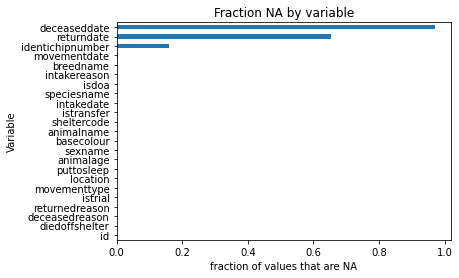

In [112]:
df.isna().mean().sort_values().plot.barh()
plt.xlabel('fraction of values that are NA')
plt.ylabel('Variable')
plt.title('Fraction NA by variable');

As illustrated in the graph above, the columns 'deceaseddate', 'returndate', and identichipnumber' represent the majority of NA values. A caveat is that na values do not encapsulate all the bad values in this dataset.

More detailed illustrations of each of the aforementioned columns are presented in the following three bar graphs.


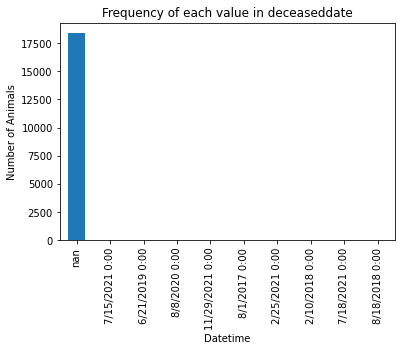

In [113]:
df['deceaseddate'].value_counts(dropna=False)[:10].plot.bar()
plt.title('Frequency of each value in deceaseddate')
plt.ylabel('Number of Animals')
plt.xlabel('Datetime');

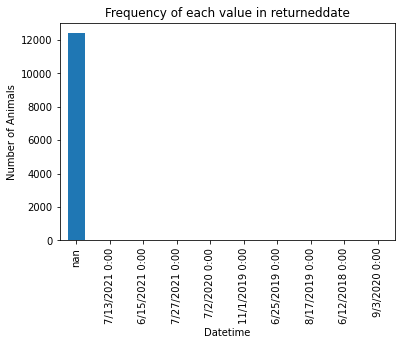

In [114]:
df['returndate'].value_counts(dropna=False)[:10].plot.bar()
plt.title('Frequency of each value in returneddate')
plt.ylabel('Number of Animals')
plt.xlabel('Datetime');

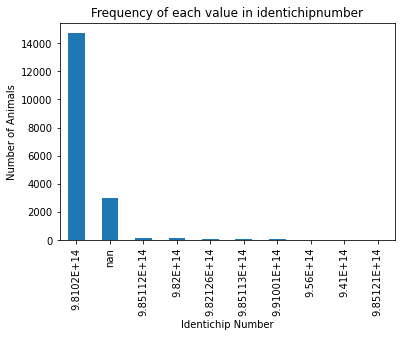

In [115]:
df['identichipnumber'].value_counts(dropna=False)[:10].plot.bar()
plt.title('Frequency of each value in identichipnumber')
plt.ylabel('Number of Animals')
plt.xlabel('Identichip Number');

The nan values in 'deceaseddate' and 'returneddate' represent animals that were not returned or did not die. The nan values in 'identichipnumber' can be due to animals without chip numbers. These features are not going to be useful in our prediction of movementtype. We plan on removing these columns in the intial preprocessing section. 

The target of this report is movementtype, below is a graph showing the frequency of each value contained within it's column. Movementtype contains the outcome of each animals time in the shelter. 




In vizualizing the target value of Movement type, firstly, the spread of types must be known.

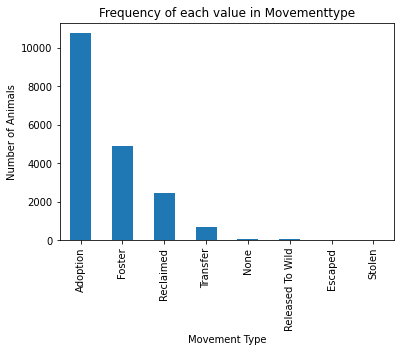

In [116]:
df['movementtype'].value_counts(dropna=False)[:10].plot.bar()
plt.title('Frequency of each value in Movementtype');
plt.xlabel('Movement Type')
plt.ylabel('Number of Animals');

The above graph illustrates that adoption is the most prevelant, followed by fostering, reclaiming and transfer. From henceforth, only these four categories are to be used because the rest are not very signifant.

# Initial Preprocessing and Cleaning: 


Columns 'deceaseddate', 'returneddate', and 'indentichipnumber' are removed because of the high percentage of NA values they contain and their relevancy to our target variable.

In [117]:
df1= df.drop(labels= ['deceaseddate','returndate', 'identichipnumber'], axis= 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18939 entries, 0 to 18938
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              18939 non-null  int64 
 1   intakedate      18939 non-null  object
 2   intakereason    18937 non-null  object
 3   istransfer      18939 non-null  bool  
 4   sheltercode     18939 non-null  object
 5   animalname      18939 non-null  object
 6   breedname       18886 non-null  object
 7   basecolour      18939 non-null  object
 8   speciesname     18939 non-null  object
 9   animalage       18939 non-null  object
 10  sexname         18939 non-null  object
 11  location        18939 non-null  object
 12  movementdate    18885 non-null  object
 13  movementtype    18939 non-null  object
 14  istrial         18939 non-null  bool  
 15  returnedreason  18939 non-null  object
 16  deceasedreason  18939 non-null  object
 17  diedoffshelter  18939 non-null  bool  
 18  puttos

Other features that are not going to be helpful in the predictions are identified to be shelter code, species name and animal name. They are also dropped because they are deemed to be too specific and adds no value. Died off shelter represents whether or not an animal died off shelter grounds, which happens after to the target value, so it is dicarded. Decesased reason, returned reason, put to sleep and is dead on arrival also happens after movement type so they are also irrelevant to the prediction and therefore dropped also. 

In [118]:
df1= df.drop(labels= ['id','istransfer','sheltercode','animalname',
                      'location','istrial','deceaseddate','returndate', 'identichipnumber',
                      'returnedreason','deceasedreason','diedoffshelter','puttosleep','isdoa'], axis= 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18939 entries, 0 to 18938
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   intakedate    18939 non-null  object
 1   intakereason  18937 non-null  object
 2   breedname     18886 non-null  object
 3   basecolour    18939 non-null  object
 4   speciesname   18939 non-null  object
 5   animalage     18939 non-null  object
 6   sexname       18939 non-null  object
 7   movementdate  18885 non-null  object
 8   movementtype  18939 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


The next code cell represets our conditioning of movementtype to hold only top 4 values.

In [119]:
df1= df1[(df1['movementtype']=='Adoption') | (df1['movementtype']=='Foster') | (df1['movementtype']=='Reclaimed') | (df1['movementtype']=='Transfer') ]

The two columns containing date/time data (intake date and movement date) are converted to timestamps for easy manipulations later.

In [120]:
df1['movementdate']= pd.to_datetime(df['movementdate'])
df1['movementdate'].head(10) 

0   2017-05-13
1   2017-04-24
2   2017-04-15
3   2020-02-29
4   2017-04-18
5   2018-05-29
6   2013-03-30
7   2017-05-09
8   2017-04-12
9   2017-04-12
Name: movementdate, dtype: datetime64[ns]

In [121]:
df1['intakedate']= pd.to_datetime(df['intakedate'])
df1['intakedate'].head(10)

0   2009-11-28
1   2009-12-08
2   2012-08-10
3   2012-08-10
4   2013-01-11
5   2013-01-11
6   2013-03-26
7   2013-03-26
8   2015-06-19
9   2015-06-19
Name: intakedate, dtype: datetime64[ns]

# Exploration and Visualization: 


First column that is examined is the intake reason. These reasons, for example being stray or not, can be a determining factor of how a pet is ultimately being moved.

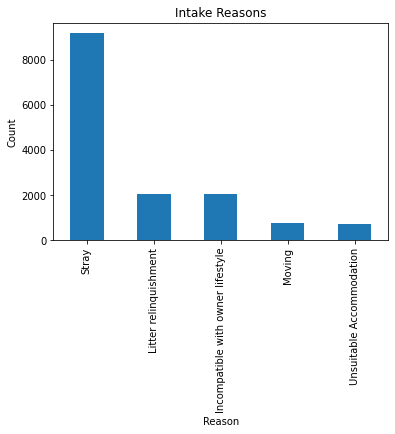

In [122]:
df['intakereason'].value_counts().head(5).plot.bar()
plt.title("Intake Reasons")
plt.xlabel("Reason");
plt.ylabel("Count");

In the graph above, the reason how pets get into the animal shelter is demonated by strays, followed by litter reliquishment and incompatible with owner lifestyle coming in a very distant second and third respectively. There are a lot more reasons presented in the raw data set but they are very minimal so just the top 5 is selected.

Secondly, species type may be very important in determining how the animals are ultimately being moved.

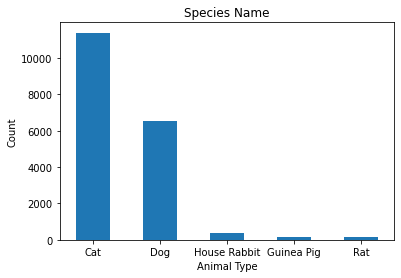

In [123]:
df['speciesname'].value_counts().head(5).plot.bar(rot=0)
plt.title("Species Name")
plt.xlabel("Animal Type");
plt.ylabel("Count");

In the graph above, the various animal types are represented by the column 'speciesname.' It is dominated by two main types, which are cats and dogs. Like the previous graph, the other types of pets, namely rabbits, Guinea pigs and rats which represent the third to fifth most prevelent, along with the rest, are removed because the data values for them are very small.

Now solely focused on the two most prevelent pets (cats and dogs), the remaining visualizations center around them. Below is a graph depicting the reas

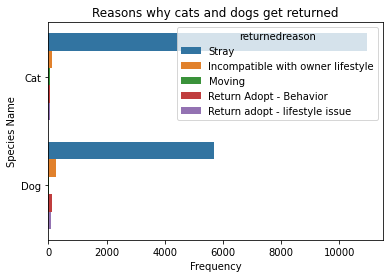

In [124]:
veh= df[(df['speciesname'].isin(["Cat", "Dog"])) & (df['returnedreason'].isin(["Stray","Incompatible with owner lifestyle","Return Adopt - Behavior","Return adopt - lifestyle issue","Moving"]))]
sns.countplot(y='speciesname', data=veh, hue='returnedreason')
plt.title("Reasons why cats and dogs get returned");
plt.xlabel("Frequency")
plt.ylabel("Species Name");

As illustrated by the bar graph above, the main reason why both cats and dogs are returned is because they were strays. 

Now, the the various movement types are examined given the species type being cat and dog. Prior to doing so, the counts of all the various unique values within the 'movementtype' column prior to focusing on just cats and dogs are invaluebale.

In [125]:
df["movementtype"].value_counts()

Adoption            10761
Foster               4912
Reclaimed            2451
Transfer              708
None                   54
Released To Wild       36
Escaped                 9
Stolen                  8
Name: movementtype, dtype: int64

The table above shows that most of all pets are being adopted, followed by fostering and then reclaimed. This is a great sign for animal lovers as most of them find themselves in permanent homes via adoptions and if they don't, at least they are in temporary places via fostering and not staying at an animal shelter for the most part. 

The movement type is now conditioned to just include cats and dogs.

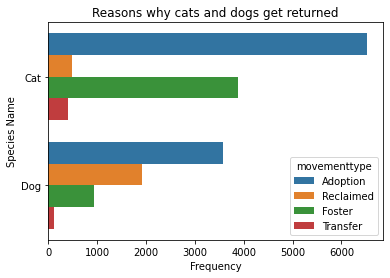

In [126]:
veh= df[(df['speciesname'].isin(["Cat", "Dog"])) & (df['movementtype'].isin(["Adoption","Foster","Reclaimed","Transfer"]))]
sns.countplot(y='speciesname', data=veh, hue='movementtype')
plt.title("Reasons why cats and dogs get returned");
plt.xlabel("Frequency")
plt.ylabel("Species Name");

For the graph above on movement type, many values (none, released to the wild, escaped, and stolen) are not present. The release to the wild value can be explained because birds, which are pets, can be released. The escaped and stolen categories can be attributed to smaller pets like Guinea pigs and rats which can easily escape from cages or can be easily placed into bags or pockets and taken out of the facilities without detection.

The main (most prevelant) movement type is adoption. The second most prevelant movement type differs for cats and dogs though. This can be because cats are usually not reclaimed but dogs, being viewed as the more affectionate of the two, are. 

Does sex have any effect on movementtype?

Another determining factor in how pets are ultimately being moved is their gender. 

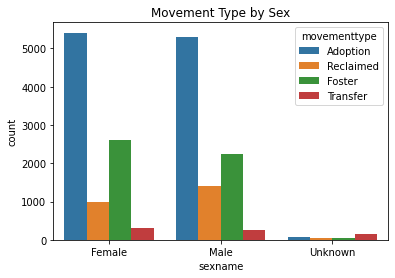

In [127]:
sns.countplot(x='sexname', data= df1, hue= 'movementtype')
plt.title('Movement Type by Sex');

The graph indicates that the sex of the animal has no effect on adoption frequency. There is small difference when looking at whether the animal was reclaimed or fostered. Females tend to be fostered more often. Males tend to be reclaimed. The data is dominated by a handful of categories: 'Adoption', 'Reclaimed', 'Foster, and 'Transfer'. 

After looking at the graph above, I would curious what effect species has on movement type.

In [128]:
df1['speciesname'].value_counts().head(10)

Cat             11299
Dog              6536
House Rabbit      347
Guinea Pig        175
Rat               163
Bird               77
Livestock          37
Hamster            26
Mouse              20
Hedgehog           18
Name: speciesname, dtype: int64

Focusing on just cats and dogs, the distribution on movement types are examined.

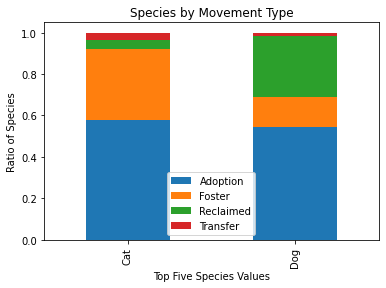

In [129]:
df_S= df1[(df1['speciesname']== 'Cat') | (df1['speciesname']== 'Dog') ]
pd.crosstab(df_S['speciesname'], df_S['movementtype'], normalize= 'index').plot.bar(stacked= True)
plt.title('Species by Movement Type')
plt.legend(loc= 'lower center')
plt.ylabel('Ratio of Species')
plt.xlabel('Top Five Species Values');

As shown in the graph above, cats and dogs seem to be mostly adopted. The difference between the two comes in forms of foster and reclaimed. Cats seemed to be fostered more, while dogs are reclaimed more. 

Do younger animal tend to be adopted more? 

Age can also play a pivotal role in determining what is the movement type of the pet. 

In [130]:
df_S['animalage'].value_counts().head(5)

8 months.            1747
2 years 2 months.     472
1 year 2 months.      462
2 years 1 month.      453
1 year 1 month.       449
Name: animalage, dtype: int64

In [131]:
df_S['animalage']= df_S['animalage'].str.extract('(^\d*)(\d*)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
df_S['animalage'].value_counts().head(10)

1     3303
2     3135
3     2576
8     2166
4     1189
6      834
5      831
7      709
11     598
10     569
Name: animalage, dtype: int64

The age column is converted from '#years #months' to just a number representing years. There is definitely some bad data present in this column. Consider removing those rows. The above code might be better placed in the intial Preprocessing section*

The age columns are just placed into bins representing only the animal's age in year. After, the first 16 points are taken because the occurence of the rest of the data are less than 100 and therefore are deemed to be less relevant.

What is the age range for each species?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


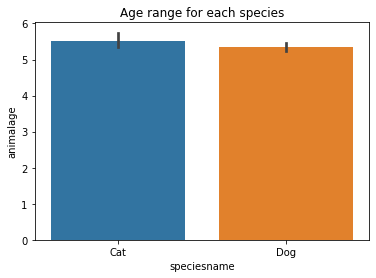

In [133]:
df_S['animalage']= df_S['animalage'].astype(int)
sns.barplot(x = 'speciesname', y = 'animalage', data = df_S)
plt.title('Age range for each species');

# Data Preparation for Machine Learning: 

A new column is created to represent the duration of stay in the various shelters. The length of stay within the shelter can also be a determinant of a pet's movement in the end.

In [134]:
df_S['monthsInShelter']= ((df_S['movementdate'].dt.year - df_S['intakedate'].dt.year)*12) + abs(df_S['movementdate'].dt.month - df_S['intakedate'].dt.month)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
df_S['monthsInShelter'].value_counts().head(10)

0     8026
1     5204
2     2040
3      686
23     304
4      211
22     184
21     123
5      109
20      92
Name: monthsInShelter, dtype: int64

Due to the nature of timestamps of not being able to employed in decision trees, they are also being dropped, but are replaced by the month in shelter column.

In [136]:
df_S.drop(labels= ['intakedate', 'movementdate'], axis= 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Another potential key determinant of movement type of a pet is the intake reason.

In [137]:
df_S['intakereason'].value_counts()

Stray                                8936
Litter relinquishment                2028
Incompatible with owner lifestyle    1767
Unsuitable Accommodation              676
Moving                                624
Unable to Afford                      606
Born in Shelter                       512
Abandoned                             454
Police Assist                         411
Transfer from Other Shelter           406
Landlord issues                       264
Owner Deceased                        205
Sick/Injured                          202
Allergies                             138
Incompatible with other pets          138
TNR - Trap/Neuter/Release             105
Biting                                 84
Rabies Monitoring                      82
Marriage/Relationship split            77
Behavioral Issues                      40
Abuse/ neglect                         29
Owner Died                             27
Owner requested Euthanasia             20
Return adopt - lifestyle issue    

Due to the large amount of variety of unique values in the column, it is replaced by a new column isStray. This new column encapsulates whether or not the animal was a stray upon inception.

In [138]:
df_S['isStray']= (df_S['intakereason'] == 'Stray')
df_S.drop(labels= ['intakereason'], axis= 1, inplace= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [139]:
df_S['isStray'].value_counts()

True     8936
False    8899
Name: isStray, dtype: int64

The code cell below selects the top 15 most prevalent values in the breed name column. We are doing this in order to limit the the variation in the breed name column. 

In [140]:
df_S= df_S[(df_S['breedname']== 'Domestic Short Hair') | (df_S['breedname']== 'Domestic Medium Hair') | (df_S['breedname']== 'Bully Breed Mix') | (df_S['breedname']== 'Domestic Long Hair') | (df_S['breedname']== 'Labrador Retriever') | (df_S['breedname']== 'Beagle') | (df_S['breedname']== 'Labrador Retriever/Mix') | (df_S['breedname']== 'Chihuahua') | (df_S['breedname']== 'Hound/Mix') | (df_S['breedname']== 'Pitbull') | (df_S['breedname']== 'German Shepherd Dog') | (df_S['breedname']== 'Shep Mix') | (df_S['breedname']== 'Hound') | (df_S['breedname']== 'Mix') | (df_S['breedname']== 'Husky')]

Due to the large amount of variation and the fact that breeds are different for cats and dogs, the following data manipulations are going to be split into two categories: cats first because there are more data on cats, and then dogs.

In [141]:
df_cat= df_S[df_S['speciesname']== 'Cat']
df_dog= df_S[df_S['speciesname']== 'Dog']

In [142]:
df_cat.drop(labels=['speciesname'], inplace= True, axis= 1)
df_dog.drop(labels=['speciesname'], inplace= True, axis= 1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [143]:
df_cat['breedname'].value_counts().head(20)

Domestic Short Hair     9304
Domestic Medium Hair     876
Domestic Long Hair       620
Name: breedname, dtype: int64

As expected, cats are divided into 3 most prevalent breed types: domestic short, medium and long hair. 

In [144]:
df_cat= pd.get_dummies(df_cat, columns=['breedname'])

In [145]:
df_dog['breedname'].value_counts().head(20)

Bully Breed Mix           627
Labrador Retriever        258
Beagle                    244
Labrador Retriever/Mix    235
Chihuahua                 168
Hound/Mix                 154
Pitbull                   144
German Shepherd Dog       133
Shep Mix                  110
Hound                     108
Mix                       107
Husky                     103
Name: breedname, dtype: int64

On ther hand, the breed names for dogs have more evenly distributed values so only the top 12 most prevelent values are used. 

In [146]:
df_dog= pd.get_dummies(data= df_dog, columns= ['breedname'])

*joshua: conducting cat/dog split, gives us a small dog population to work with. and a big cat population. I'm not sure how acurate our results for dog will be since dog is such a small population and we still have to remove data from it. 
use dummy variables on dog/cat df's. Think about using ordinal encoding since we we would have too many new features as a result of using dummy variables.*

After conducting the cat/dog split, population for cats is large relative to that for dogs. We suspect our Decision Tree Model for Dogs will not be as dependable as the Cat's model.

Next, the base color columns for cats and dogs are prepared.

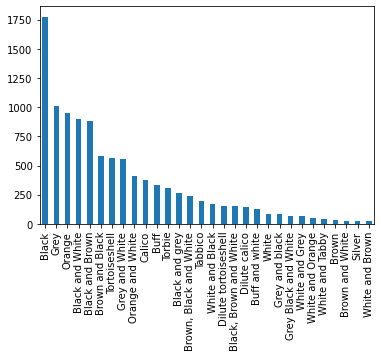

In [147]:
df_S[df_S['speciesname']== 'Cat']['basecolour'].value_counts().head(30).plot.bar()

Again, the sheer amount of unique values imposes a problem for later manipulation. To resolve it, the animals with more than one color are grouped into a larger category, mixed colors.

In [148]:
df_cat['basecolour'][df_cat['basecolour'].str.contains('and')]= 'Mixed Colors'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
df_cat['basecolour'].value_counts().head(15)

Mixed Colors            4729
Black                   1774
Grey                    1010
Orange                   953
Tortoiseshell            562
Calico                   374
Buff                     331
Torbie                   305
Tabbico                  196
Dilute tortoiseshell     155
Dilute calico            149
White                     88
Brown                     31
Silver                    25
Lynx point                17
Name: basecolour, dtype: int64

Only the first 11 base color values are used so as to limit the amount of new dummy variables to be created.

In [150]:
df_cat['basecolour']= df_cat['basecolour'][(df_cat['basecolour']== 'Mixed Colors') | (df_cat['basecolour']== 'Black') | (df_cat['basecolour']== 'Grey') | (df_cat['basecolour']== 'Orange') | (df_cat['basecolour']== 'Tortoiseshell') | (df_cat['basecolour']== 'Calico') | (df_cat['basecolour']== 'Buff') | (df_cat['basecolour']== 'Torbie') | (df_cat['basecolour']== 'Tabbico') |(df_cat['basecolour']== 'Dilute tortoiseshell') | (df_cat['basecolour']== 'Dilute calico') ] 

In [151]:
df_cat= pd.get_dummies(data= df_cat, columns=['basecolour'])

After the creation of the dummy variables for the base color of cats, the same procedures (code blocks) are used on dogs.

In [152]:
df_dog['basecolour'][df_dog['basecolour'].str.contains('and')]= 'Mixed Colors'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
df_dog['basecolour'].value_counts().head(30)

Mixed Colors    1145
Black            310
Tricolour        209
Brindle          130
Tan              129
Brown             76
White             72
Red               59
Chocolate         49
Blue              46
Cream             35
Grey              32
Yellow            29
Golden            19
Blue merle        11
Fawn               8
Various            8
Buff               4
Smoke              4
Lilac              3
Cinnamon           3
Silver             3
Red merle          3
Apricot            3
Ruddy              1
Name: basecolour, dtype: int64

We are only focusing on the top 7 values in dog's basecolour. They represent the majority of the data.

In [154]:
df_dog['basecolour']=df_dog['basecolour'][(df_dog['basecolour']== 'Mixed Colors') | (df_dog['basecolour']== 'Black') | (df_dog['basecolour']== 'Tricolour') | (df_dog['basecolour']== 'Brindle') | (df_dog['basecolour']== 'Tan') | (df_dog['basecolour']== 'Brown') | (df_dog['basecolour']== 'White')]

In [155]:
df_dog= pd.get_dummies(data= df_dog, columns= ['basecolour'])

Data preparation on sex name, also known as gender, is next.

In [156]:
df_cat= df_cat[df_cat['sexname']!= 'Unknown']

Due the ambiguity that comes with unknown values for a male/female category, they are taken out before further manipulation.

In [157]:
df_cat= pd.get_dummies(data= df_cat, columns=['sexname'])

In [158]:
df_dog= df_dog[df_dog['sexname']!= 'Unknown']

In [159]:
df_dog= pd.get_dummies(data= df_dog, columns=['sexname'])

Movement type is the next data column to be processed.

In [160]:
df_cat['movementtype'].value_counts()

Adoption     6216
Foster       3687
Reclaimed     452
Transfer      280
Name: movementtype, dtype: int64

In [161]:
df_dog['movementtype'].value_counts()

Adoption     1226
Reclaimed     764
Foster        352
Transfer       40
Name: movementtype, dtype: int64

In [162]:
df_cat['isAdopted']= (df_cat['movementtype']== 'Adoption')
df_cat['isAdopted'].value_counts()

True     6216
False    4419
Name: isAdopted, dtype: int64

In [163]:
df_dog['isAdopted']= (df_dog['movementtype']== 'Adoption')
df_dog['isAdopted'].value_counts()

True     1226
False    1156
Name: isAdopted, dtype: int64

In [164]:
df_cat.drop(labels=['movementtype'], axis=1, inplace= True)
df_dog.drop(labels=['movementtype'], axis=1, inplace= True)

Again, as seen in multiple occasions before, due to the large spread, movement type is recategorized into adopted or not adopted. Based on the number of True and False values with isAdopted, we would say our target variable is balanced.

# Machine Learning:

For our cat and dog models, we have decided to use a classification decision tree. This is due to the nature of our data. Our target variable is categorical and our predictors are mainly categorical as well. We plan to achieve an overfit model, then tune the tree accordingly.  

## Cat:




Our baseline accuracy was computed to be about 58.5%. To find this nuber we found the probability that a Cat was adopted.

In [165]:
target= 'isAdopted'
baseline= (df_cat[target].values).mean()

In [166]:
baseline

0.5844851904090268

Below is our first and untuned Decision tree. After training and fiting the tree, we achieved a 10% increase in accuracy. 

In [167]:
target= 'isAdopted'
y= df_cat[target].values

predictors= df_cat.columns[df_cat.columns != target] #start with all features as predictors
X= df_cat[predictors].values

X_train, X_test, y_train,y_test= train_test_split(X,y, test_size= .33)

clf= DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_predict= clf.predict(X_test)
clf.score(X_test, y_test)

0.6954415954415955

A 10% accuracy increase is great, but we still have to check for overfitting and tune the tree accordingly. 

In order to diagnose the magnitude of overfitting, we have plotted a learning curve below.

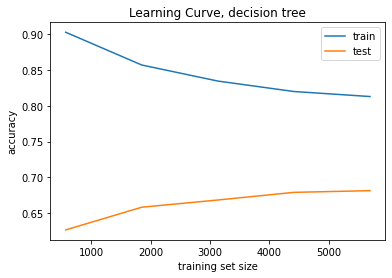

In [168]:
train_sizes, train_scores, test_scores = learning_curve( clf, X_train, y_train, cv=5, scoring='accuracy')

train_scores_mean= np.mean(train_scores, axis=1)
test_scores_mean= np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label= 'train')
plt.plot(train_sizes, test_scores_mean, label= 'test')
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.title('Learning Curve, decision tree')
plt.legend();

Based on the learning curve above there is high variance, also known as overfitting, indicated by the large gap betweeen the train and test data. The hyperparameters needs tuned to close the gap.

Below is a list of values representing the level of importance for each predictor. We will only pick the most important predictors based on this list.

In [169]:
clf.feature_importances_

array([0.15678321, 0.49953971, 0.04159194, 0.01586494, 0.01662076,
       0.02344141, 0.03129574, 0.01445246, 0.01599032, 0.0059285 ,
       0.0071954 , 0.02412583, 0.02824405, 0.02373044, 0.00789805,
       0.01427756, 0.01490661, 0.02142341, 0.03668969])

In [170]:
pd.Series(clf.feature_importances_, predictors).sort_values(ascending= False)

monthsInShelter                    0.499540
animalage                          0.156783
isStray                            0.041592
sexname_Male                       0.036690
basecolour_Black                   0.031296
basecolour_Mixed Colors            0.028244
basecolour_Grey                    0.024126
basecolour_Orange                  0.023730
breedname_Domestic Short Hair      0.023441
sexname_Female                     0.021423
breedname_Domestic Medium Hair     0.016621
basecolour_Calico                  0.015990
breedname_Domestic Long Hair       0.015865
basecolour_Tortoiseshell           0.014907
basecolour_Buff                    0.014452
basecolour_Torbie                  0.014278
basecolour_Tabbico                 0.007898
basecolour_Dilute tortoiseshell    0.007195
basecolour_Dilute calico           0.005928
dtype: float64

Based on the above info, the most important features for Cat are monthsinshelter, animalage, and isStray.

Below is a plot of our intial decision tree.

In [171]:
targetNames= ['Adopted', 'Not Adopted']
dot_data= export_graphviz(clf, precision= 2, feature_names= predictors, proportion= True, class_names=targetNames, filled=True, rounded= True, special_characters= True)

graph = graphviz.Source(dot_data)
graph;

In [172]:
predictors = pd.Series(clf.feature_importances_, predictors).sort_values(ascending= False)[:5].index

The first way used to tune the hyperparameters is by assigning random combinations of numbers and see which lessened our overfitting.

Hyperparameteres max_depth and min_samples_leaf are tuned. Max_depth starts off at 20 and is decremented by 5 each time until overfitting becomes underfitting. From there, the best value is found to be 8. For min_samples_leaf, the default value is one, but an increase to 2, which ends up being used, decreases the variance (overfitting) without increasing bias (underfitting) very much.

In [173]:
X= df_cat[predictors].values

X_train, X_test, y_train,y_test= train_test_split(X,y, test_size= .33)

clf= DecisionTreeClassifier(random_state=0, max_depth= 8, min_samples_leaf= 1)
clf.fit(X_train, y_train)

y_predict= clf.predict(X_test)
clf.score(X_test, y_test)

0.7367521367521368

There is a relatively small increase in accuracy (from 0.700 to 0.727) with this method.

The learning curve below does show a decrease in overfiting.

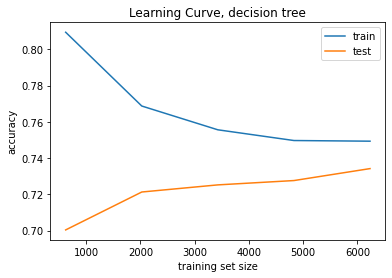

In [174]:
train_sizes, train_scores, test_scores = learning_curve( clf, X_train, y_train, cv=8, scoring='accuracy')

train_scores_mean= np.mean(train_scores, axis=1)
test_scores_mean= np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label= 'train')
plt.plot(train_sizes, test_scores_mean, label= 'test')
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.title('Learning Curve, decision tree')
plt.legend();

In [175]:
targetNames= ['Adopted', 'Not Adopted']
dot_data= export_graphviz(clf, precision= 2, feature_names= predictors, proportion= True, class_names=targetNames, filled=True, rounded= True, special_characters= True)

graph = graphviz.Source(dot_data)
graph;

The method of using random combinations does not yield an acceptable result. In order to achieve a more systematic result grid search with cross validation is used next.

In [176]:
grid= {'max_depth': range(2, 15, 1), 'min_samples_split': range(2, 40, 2), 'min_samples_leaf': range(1,20,2) }

clfCV= GridSearchCV(DecisionTreeClassifier(), grid, cv= 5, scoring='accuracy')

clfCV.fit(X_train, y_train)
print(clfCV.best_params_)
print(clfCV.best_score_)

{'max_depth': 5, 'min_samples_leaf': 7, 'min_samples_split': 2}
0.7400701754385965


By using grid seach, the accuracy is now 0.743, which is a more significant increase from the baseline of 0.700, as compared to the random combination method, yielding an accuracy of 0.727.

We are going to use the hyperparameters determined by the grid search in our final model.

In [177]:
clf= DecisionTreeClassifier(random_state=0, max_depth= 2, min_samples_leaf= 1, min_samples_split= 2)
clf.fit(X_train, y_train)

y_predict= clf.predict(X_test)
clf.score(X_test, y_test)

0.7396011396011396

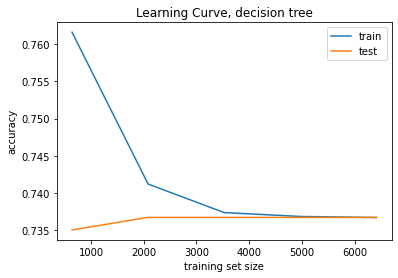

In [178]:
train_sizes, train_scores, test_scores = learning_curve( clf, X_train, y_train, cv=10, scoring='accuracy')

train_scores_mean= np.mean(train_scores, axis=1)
test_scores_mean= np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label= 'train')
plt.plot(train_sizes, test_scores_mean, label= 'test')
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.title('Learning Curve, decision tree')
plt.legend();

Comparing the two learning curves, the gap between the train and test data becomes a lot smaller, which signifies a greater decrease in overfitting. 

Below is graph of our final decision tree. 

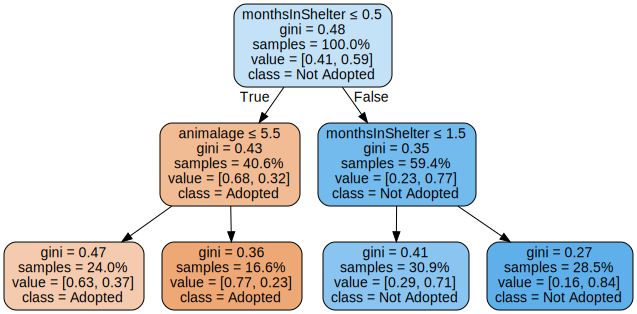

In [179]:
targetNames= ['Adopted', 'Not Adopted']
dot_data= export_graphviz(clf, precision= 2, feature_names= predictors, proportion= True, class_names=targetNames, filled=True, rounded= True, special_characters= True)

graph2 = graphviz.Source(dot_data)
graph2

Below are our precission, recall, and cross validation scores, in that order.

In [180]:
TP= ((y_predict == 1) & (y_test == 1)).sum()
precision_score(y_test, y_predict)

0.7707528957528957

In [181]:
recall_score(y_test, y_predict)

0.7843811394891945

In [182]:
cross_val_score (clf, X, y, cv = 5, scoring ='accuracy')

array([0.71462153, 0.7296662 , 0.72590503, 0.76915844, 0.74894217])

To give a clearer picture of our precision and recall, we included a confusion matrix. On the y-axis, you have the actual values for isAdopted. On the x-axis, you have the predicted values for isAdopted. The purple squares are where our Tree misinterpreted it's predictions. The remaining squares indicate correct preditions.



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


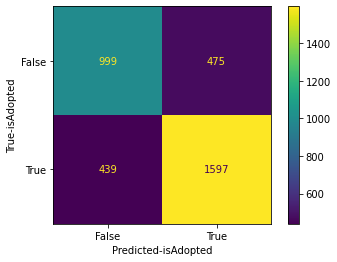

In [183]:
plot_confusion_matrix(clf, X_test, y_test)
plt.ylabel('True-isAdopted')
plt.xlabel('Predicted-isAdopted');

##Dog:

Below we computed a baseline accuracy of 51.4%. This value is derived from the probability of a dog being adopted.

In [184]:
target= 'isAdopted'
baseline= (df_dog[target].values).mean()

In [185]:
baseline

0.5146935348446684

In order to achieve an overfitted decision tree, we are training an untuned tree with our dog data.

In [186]:
target= 'isAdopted'
y= df_dog[target].values

predictors= df_dog.columns[df_dog.columns != target] #start with all features as predictors
X= df_dog[predictors].values

X_train, X_test, y_train,y_test= train_test_split(X,y, test_size= .33)

clf= DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

y_predict= clf.predict(X_test)
clf.score(X_test, y_test)

0.6073697585768743

With an untuned tree, we got a 10% increase in accuracy. Before tuning the tree, we will attempt to decrease any overfitting.

To diagnose the magnitude of overfitting in our tree, we plotted a learning curve below.

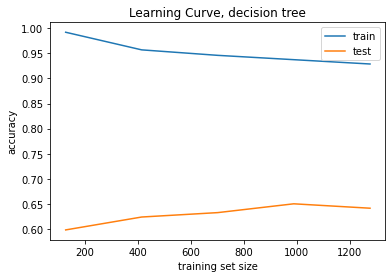

In [187]:
train_sizes, train_scores, test_scores = learning_curve( clf, X_train, y_train, cv=5, scoring='accuracy')

train_scores_mean= np.mean(train_scores, axis=1)
test_scores_mean= np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label= 'train')
plt.plot(train_sizes, test_scores_mean, label= 'test')
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.title('Learning Curve, decision tree')
plt.legend();

The huge gap between the train and test data lines indicates that we have a high degree of overfitting.

To try and combat this overfitting, we will pick only the most impactful predictors moving forward.

In [188]:
clf.feature_importances_

array([0.21720994, 0.27190561, 0.07120443, 0.00899253, 0.02094418,
       0.02308383, 0.01984126, 0.01143669, 0.02764121, 0.00965361,
       0.01291323, 0.01531315, 0.0163173 , 0.01574801, 0.01116325,
       0.03187527, 0.02153046, 0.01067874, 0.05076402, 0.02727711,
       0.00834499, 0.0186141 , 0.04005068, 0.0374964 ])

In [189]:
pd.Series(clf.feature_importances_, predictors).sort_values(ascending= False)

monthsInShelter                     0.271906
animalage                           0.217210
isStray                             0.071204
basecolour_Mixed Colors             0.050764
sexname_Female                      0.040051
sexname_Male                        0.037496
basecolour_Black                    0.031875
breedname_Hound/Mix                 0.027641
basecolour_Tan                      0.027277
breedname_Chihuahua                 0.023084
basecolour_Brindle                  0.021530
breedname_Bully Breed Mix           0.020944
breedname_German Shepherd Dog       0.019841
basecolour_White                    0.018614
breedname_Mix                       0.016317
breedname_Pitbull                   0.015748
breedname_Labrador Retriever/Mix    0.015313
breedname_Labrador Retriever        0.012913
breedname_Hound                     0.011437
breedname_Shep Mix                  0.011163
basecolour_Brown                    0.010679
breedname_Husky                     0.009654
breedname_

In [190]:
predictors = pd.Series(clf.feature_importances_, predictors).sort_values(ascending= False)[:12].index

In [191]:
predictors

Index(['monthsInShelter', 'animalage', 'isStray', 'basecolour_Mixed Colors',
       'sexname_Female', 'sexname_Male', 'basecolour_Black',
       'breedname_Hound/Mix', 'basecolour_Tan', 'breedname_Chihuahua',
       'basecolour_Brindle', 'breedname_Bully Breed Mix'],
      dtype='object')

Based on the feature importance scores derived from on tree, we found 12 predictors that are the most impactful.

Another method for tuning a tree is picking the best values for our hyperparameters. Below we are use a GridsearchCV, this will test combinations of our hyperparameters and give us the best combination.

In [192]:
X= df_dog[predictors].values

X_train, X_test, y_train,y_test= train_test_split(X,y, test_size= .33)

grid= {'max_depth': range(2, 15, 1), 'min_samples_split': range(2, 40, 2), 'min_samples_leaf': range(1,20,2) }

clfCV= GridSearchCV(DecisionTreeClassifier(), grid, cv= 5, scoring='accuracy')

clfCV.fit(X_train, y_train)
print(clfCV.best_params_)
print(clfCV.best_score_)

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 8}
0.6952978056426332


With our new parameters, we are going to develop our final Tree.

In [193]:
clf= DecisionTreeClassifier(random_state=0, max_depth= 8, min_samples_leaf=3, min_samples_split=6)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6759847522236341

We have achieved an additional 8% increase in accuracy with the use of our new paramters.

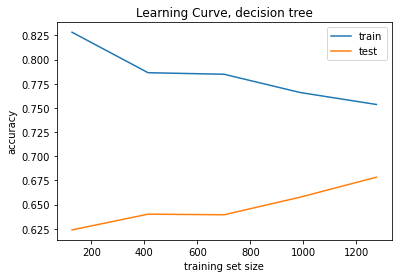

In [194]:
train_sizes, train_scores, test_scores = learning_curve( clf, X_train, y_train, cv=5, scoring='accuracy')

train_scores_mean= np.mean(train_scores, axis=1)
test_scores_mean= np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label= 'train')
plt.plot(train_sizes, test_scores_mean, label= 'test')
plt.xlabel('training set size')
plt.ylabel('accuracy')
plt.title('Learning Curve, decision tree')
plt.legend();

The gap between the train and test accuracy is lessened, but still not where we would like it. Further tuning and an increase in dog data would help decrease this gap further.

Our final Desicion Tree for predicting adoption for Dogs is below.

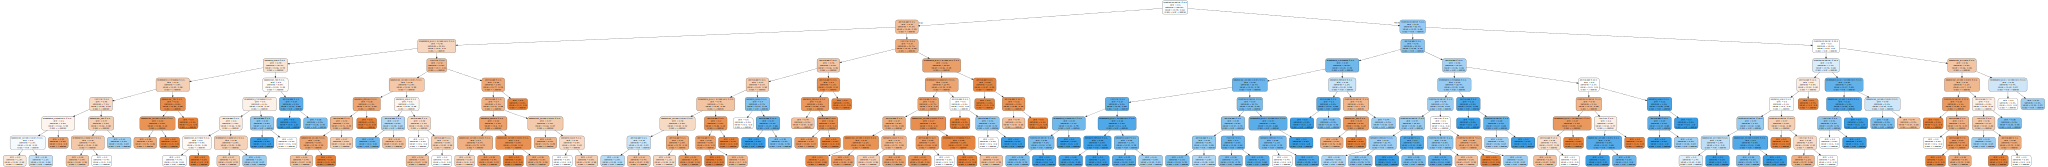

In [195]:
targetNames= ['Adopted', 'Not Adopted']
dot_data= export_graphviz(clf, precision= 2, feature_names= predictors, proportion= True, class_names=targetNames, filled=True, rounded= True, special_characters= True)

graph2 = graphviz.Source(dot_data)
graph2

Below are our precission, recall, and cross validation scores, in that order.



In [196]:
precision_score(y_test, y_predict)

0.5128205128205128

In [197]:
recall_score(y_test, y_predict)

0.4326923076923077

In [198]:
cross_val_score (clf, X, y, cv = 5, scoring ='accuracy') #look up cross val score

array([0.62893082, 0.65828092, 0.68067227, 0.67436975, 0.68067227])

To give a clearer picture of our precision and recall, we included a confusion matrix. On the y-axis, you have the actual values for isAdopted. On the x-axis, you have the predicted values for isAdopted. The purple squares are where our Tree misinterpreted it's predictions. The remaining squares indicate correct preditions.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


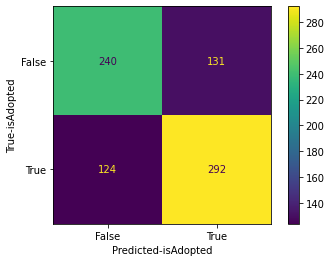

In [199]:
plot_confusion_matrix(clf, X_test, y_test)
plt.ylabel('True-isAdopted')
plt.xlabel('Predicted-isAdopted');

# Conclusions: 

The inital decision trees for cats and dogs with all the predictors had accuracy of .700 and 0.621 repectively. After using the gridsearchCV to tune the hyperparameters, the accuracy for both went up to 0.736 and 0.642. The most important predictors cats being adopted via decision trees are the amount of months in the shelter, the age, if they were stray or not, and if they were mixed color. Similarly, the predictors for dogs are as follows: amount of months spent in the shelter, age, if it was stray ot not, then gender (male, then female) and lastly, if it is mixed colored.

The small amount of data entries for dogs presented a small hinderance to the results. The initial (raw) dataset has a few. In addition, due to all the conditioning applied to it, the amount shrunk even more. The top 5 breednames were used so as to make the decision trees more managable. Similarly, data entries from base color were lost. Additonal entries with unknown gender were also dropped. As a result, the accuracy for dogs are very low, but as more entries for dogs populate more in the raw dataset, the more accurate the prediction is going to be. 